<a href="https://colab.research.google.com/github/zain4cs/Banking-Customer-Churn-Prediction/blob/main/Cutomer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Exited'].value_counts(ascending=False)

,count
Exited,
0,7963
1,2037


In [ ]:
df.groupby('Age')['Exited'].value_counts().sort_values(ascending=False)

Age  Exited
35   0         417
37   0         416
38   0         414
34   0         414
36   0         403
              ... 
82   0           1
84   0           1
     1           1
85   0           1
88   0           1
Name: count, Length: 128, dtype: int64

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis= True)

In [ ]:
num = df.select_dtypes(include=['int','float'])
num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
category= df.select_dtypes(include=['object'])
category.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [ ]:
mapping = {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].map(mapping)

display(df[['Gender','Gender']].head())

,Gender,Gender
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# df['Geography_encoder'].value_counts()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['Geography_encoder'] = le.fit_transform(df['Geography'])
# display(df[['Geography','Geography_encoder']].head())

In [ ]:
df = pd.get_dummies(df,columns=['Geography'], drop_first=True)

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 800.9 KB


In [ ]:
x = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

_____________________________________________

**Model!**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2)

_________________________________________

**RandomForest**

In [ ]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [ ]:
print("RandomForest")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Confusion: ", confusion_matrix(y_test, y_pred))
print("Classificatio: ",classification_report(y_test, y_pred))

RandomForest
Accuracy:  0.8605
Precision:  0.756198347107438
F1 Score:  0.5674418604651162
Recall:  0.45409429280397023
Confusion:  [[1538   59]
 [ 220  183]]
Classificatio:                precision    recall  f1-score   support

           0       0.87      0.96      0.92      1597
           1       0.76      0.45      0.57       403

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



___________________________________________

**LogisticRegression!**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_scaled, y_train)
y_pred = log_reg.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("LogisticRegression!")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Confusion: ", confusion_matrix(y_test, y_pred))
print("Classificatio: ",classification_report(y_test, y_pred))

LogisticRegression!
Accuracy:  0.202
Precision:  0.2016008004002001
F1 Score:  0.33555370524562866
Recall:  1.0
Confusion:  [[   1 1596]
 [   0  403]]
Classificatio:                precision    recall  f1-score   support

           0       1.00      0.00      0.00      1597
           1       0.20      1.00      0.34       403

    accuracy                           0.20      2000
   macro avg       0.60      0.50      0.17      2000
weighted avg       0.84      0.20      0.07      2000



_____________________________________

**Cross Validadtion**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
scores = cross_val_score(log,x,y,cv=5, scoring='accuracy')
print("Score of each flod: ", scores)
print("Mean CV Score: ", scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Score of each flod:  [0.809  0.8105 0.811  0.8195 0.8055]
Mean CV Score:  0.8111


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________________________

**XGBClassifier!**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_matric='logless', n_estimators=200)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:00:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.846
Precision: 0.6547231270358306
Recall: 0.4987593052109181
F1 Score: 0.5661971830985916
Confusion Matrix:
 [[1491  106]
 [ 202  201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1597
           1       0.65      0.50      0.57       403

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



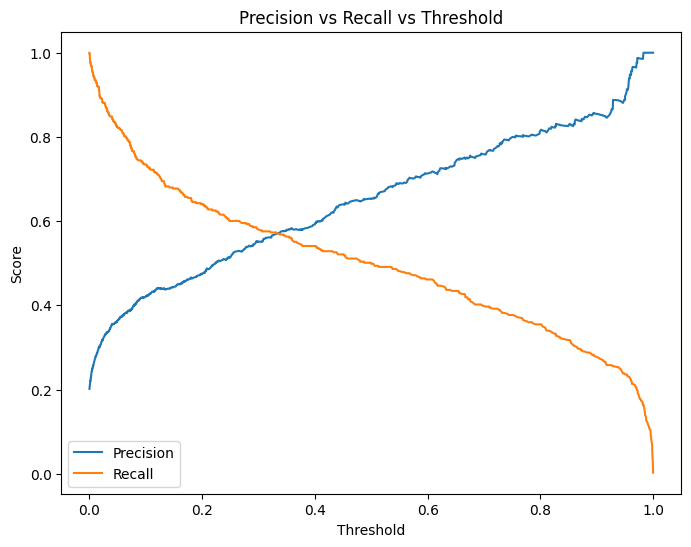

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_proba = xgb.predict_proba(x_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold")
plt.legend()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_res, y_train_res)

y_pred = log_reg.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Before SMOTE: Exited
0    6356
1    1644
Name: count, dtype: int64
After SMOTE: Exited
0    6356
1    6356
Name: count, dtype: int64
Confusion Matrix:
 [[1277  330]
 [ 175  218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1607
           1       0.40      0.55      0.46       393

    accuracy                           0.75      2000
   macro avg       0.64      0.67      0.65      2000
weighted avg       0.78      0.75      0.76      2000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


_______________________________________

**Feature Importance in XGBoost**

<Figure size 1000x600 with 0 Axes>

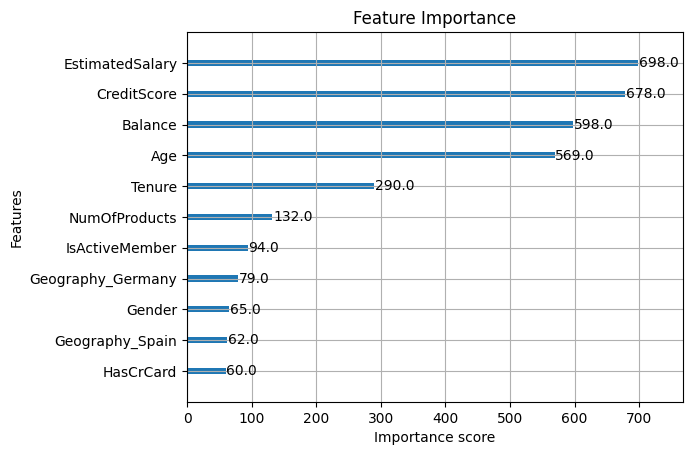

In [ ]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

model = XGBClassifier()
model.fit(x_train, y_train)

plt.figure(figsize=(10,6))
plot_importance(model, importance_type="weight")
plt.title("Feature Importance")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

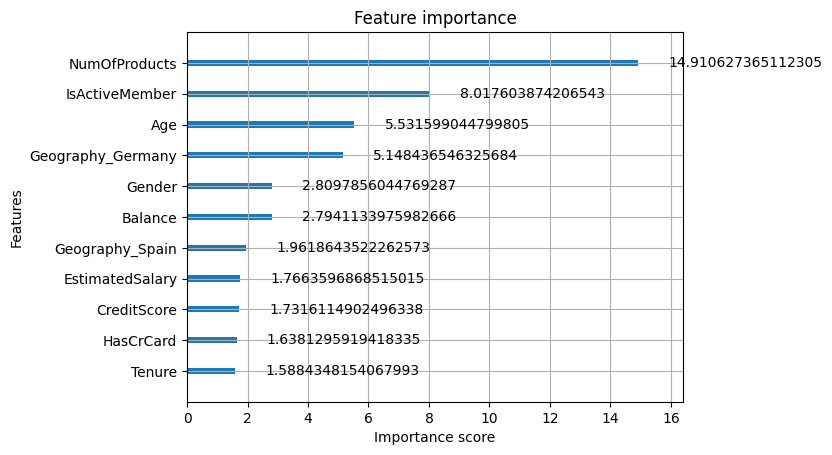

In [ ]:
plot_importance(model, importance_type="gain")